In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.options.display.float_format = '{:,}'.format

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)


In [5]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [6]:
stores_clust_info_combined3 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined2__.csv',index_col=0, dtype=sdtypes,)

In [7]:
stores_clust_info_combined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1948 non-null   object 
 1   Store_Name                        1948 non-null   object 
 2   store_revenue                     1948 non-null   float64
 3   tot_num_unique_items              1948 non-null   int64  
 4   num_unique_clusters               1948 non-null   int64  
 5   tot_item_count                    1948 non-null   int64  
 6   rev_Cheap                         1948 non-null   float64
 7   rev_High_End                      1948 non-null   float64
 8   rev_Moderately_High               1948 non-null   float64
 9   rev_Most_Variety                  1948 non-null   float64
 10  rev_Popular_Bottles               1948 non-null   float64
 11  rev_Quick_Shots                   1948 non-null   float64
 12  rev_Vo

In [8]:
stores_clust_info_combined3.shape

(1948, 40)

In [9]:
stores_clust_info_combined3.store_revenue.max() #12,208,979.84

12208979.84

In [10]:
# store_outliers = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\store_outliers.csv',index_col=0, dtype=sdtypes,)

In [11]:
# outlier_stores =list(store_outliers.Store_Number)

In [12]:
stores_clust_info_combined3_copy =stores_clust_info_combined3.copy()

In [13]:
# data1[~np.isin(data1['name'], list1)]
# stores_clust_info_combined3[~np.isin(stores_clust_info_combined3['Store_Number'],)]
# distillery
stores_clust_info_combined3['distillery'] =[True if 'distill' in store  else False  for store in stores_clust_info_combined3.Store_Name.str.lower()]
stores_clust_info_combined3['distillery'].value_counts(normalize=True).round(2)

False    0.99
True     0.01
Name: distillery, dtype: float64

### make a copy of stores_clust_info_combined4

In [14]:
stores_clust_info_combined4 = stores_clust_info_combined3.loc[stores_clust_info_combined3['distillery']==False]

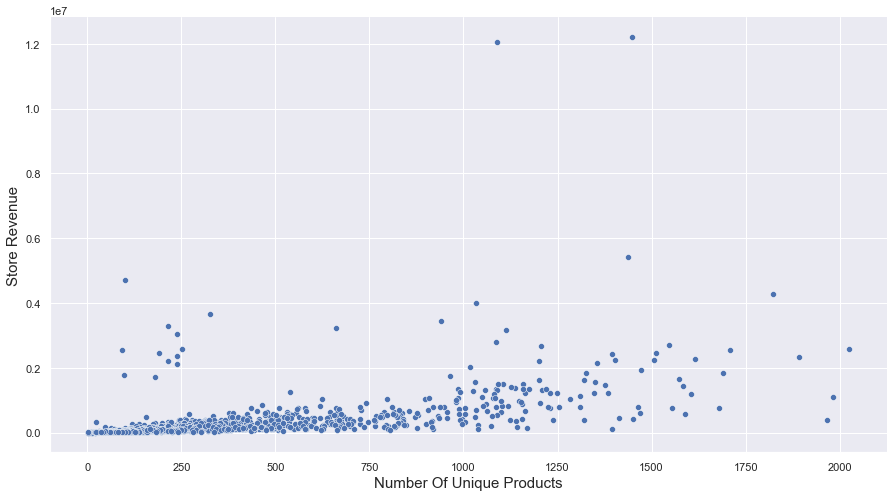

In [15]:

sns.set(rc = {'figure.figsize':(15,8)})
scatter = sns.scatterplot(x = 'tot_num_unique_items',y = 'store_revenue',data = stores_clust_info_combined4) #hue='label'
scatter.set_xlabel('Number Of Unique Products',fontsize=15)
scatter.set_ylabel('Store Revenue',fontsize=15)
sns.despine()

In [16]:
stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

,Store_Number,Store_Name,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,Address,City,Zip_Code,Store_Location,County_Number,County,distillery
3,2190,"Central City Liquor, Inc.",2592131.44,2025,7,15428,11.467196,9.146496,26.884247,28.372488,9.457966,4.174822,10.496784,11.647654,2.281566,14.551465,44.626653,6.501167,9.197563,11.193933,5.728395,3.950617,22.172840,50.172840,1.925926,7.358025,8.691358,85.294118,50.955414,51.197263,46.202819,92.857143,34.174312,38.766520,1460 2ND AVE,Des Moines,50314,POINT (-93.619788 41.605706),77,POLK,False
93,2614,Hy-Vee #3 Food & Drugstore / Davenport,2327319.65,1893,7,11239,12.438630,1.318607,7.973540,33.097479,13.726246,3.293457,28.152040,12.687962,0.694012,6.379571,40.528517,6.477445,12.661269,20.571225,5.916535,2.007396,12.044374,53.618595,2.060222,9.825674,14.527205,82.352941,24.203822,25.997719,46.157344,92.857143,42.660550,60.572687,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,False
290,3773,Benz Distributing,4282841.23,1823,7,13453,28.476186,1.580967,10.889686,28.362894,25.897798,0.481289,4.311181,17.527689,1.419758,11.016130,52.850665,7.909017,2.244852,7.031889,4.717499,3.291278,20.899616,55.622600,1.645639,8.228195,5.595173,63.235294,38.216561,43.443558,46.111869,71.428571,34.403670,22.466960,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,False
403,4129,Cyclone Liquors,1095840.22,1983,7,9923,11.090893,3.226123,28.556301,37.119859,9.066579,1.870933,9.069312,11.367530,1.279855,12.738083,51.496523,5.280661,6.066714,11.770634,6.101866,2.471004,17.952597,54.362078,1.966717,7.261725,9.884014,88.970588,31.210191,40.592930,49.022283,92.857143,33.027523,43.171806,626 Lincoln Way,Ames,50010,POINT (-93.618289 42.022865),85,STORY,False
1829,6132,Dubuque Wine & Spirits,391759.91,1966,7,3133,15.209645,2.911087,15.492438,33.555223,10.670101,8.995872,13.165635,10.533035,1.308650,11.203320,43.185445,6.160230,12.065113,15.544207,6.510682,1.271617,11.291963,52.543235,2.085453,11.902340,14.394710,94.117647,15.923567,25.313569,46.975898,97.619048,53.669725,62.334802,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,False


### create outlier data frame

In [17]:
outliers_df = stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

### remove 5 outliers

In [18]:
filt = stores_clust_info_combined4.tot_num_unique_items > 1750

In [19]:
stores_clust_info_combined4 = stores_clust_info_combined4[~filt]

In [20]:
stores_clust_info_combined4.shape

(1930, 41)

In [21]:
features = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar', 
 'cl_Cheap',
 'cl_High_End',
 'cl_Moderately_High',
 'cl_Most_Variety',
 'cl_Popular_Bottles',
 'cl_Quick_Shots',
 'cl_Volume_For_Dollar',
  'num_unique_clusters'         ]

In [22]:
scaled_features = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 'cl_Quick_Shots_scaled',
 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled']

In [23]:
stores_clust_info_combined4.head()

,Store_Number,Store_Name,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,Address,City,Zip_Code,Store_Location,County_Number,County,distillery
0,2106,Hillstreet News and Tobacco,1031323.84,625,7,3612,36.578452,0.083016,3.268945,29.301222,29.241531,0.009069,1.517765,29.374308,0.138427,3.792913,47.176080,15.420819,0.110742,3.986711,11.840000,0.800000,13.440000,61.440000,4.800000,0.640000,7.040000,54.411765,3.184713,9.578107,17.462483,71.428571,0.917431,9.691630,2217 College,Cedar Falls,50613,POINT (-92.455796 42.517182),7,BLACK HAWK,False
1,2130,Sycamore Convenience,1239675.62,538,7,3273,35.315598,0.100518,2.284485,20.150667,37.694687,0.378443,4.075603,32.997250,0.122212,2.963642,38.374580,16.681943,1.344332,7.516040,16.542751,0.743494,6.691450,55.762082,7.063197,3.531599,9.665428,65.441176,2.547771,4.104903,13.642565,90.476190,4.357798,11.453744,617 Sycamore,Waterloo,50703,POINT (-92.335358 42.497854),7,BLACK HAWK,False
2,2178,Double D Liquor Store,2933.14,39,6,39,12.843233,0.000000,4.425633,27.919567,19.502649,0.971655,34.337263,23.076923,0.000000,5.128205,33.333333,7.692308,5.128205,25.641026,23.076923,0.000000,5.128205,33.333333,7.692308,5.128205,25.641026,6.617647,0.000000,0.228050,0.591178,7.142857,0.458716,2.202643,618 Rossville Road,Waukon,52172,POINT (-91.473634 43.262114),3,ALLAMAKEE,False
4,2191,Keokuk Spirits,1342435.98,1086,7,6445,30.703253,0.385297,2.735672,23.660334,27.318011,0.737475,14.459957,21.287820,0.418929,6.159814,48.037238,8.611327,2.839410,12.645462,9.116022,1.933702,14.088398,54.696133,3.406998,7.090239,9.668508,72.794118,13.375796,17.445838,27.012278,88.095238,17.660550,23.127753,1013 Main,Keokuk,52632,POINT (-91.387724 40.399968),56,LEE,False
5,2200,Sac Liquor Store,271580.00,691,7,3310,19.751278,0.364622,3.215469,21.945349,28.357828,2.616875,23.748579,19.546828,0.151057,2.930514,35.740181,12.326284,4.864048,24.441088,11.722142,0.723589,5.933430,54.413893,4.341534,7.235890,15.629522,59.558824,3.184713,4.675029,17.098681,71.428571,11.467890,23.788546,619 E Main St,Sac City,50583,POINT (-94.974011 42.421341),81,SAC,False


In [24]:
# stores_clust_info_combined4 = stores_clust_info_combined4.reset_index()


In [25]:
# stores_clust_info_combined4.head()

In [26]:
# stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=['index'])

In [27]:
scaler = StandardScaler()

In [28]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

### scale features

In [29]:
stores_clust_info_combined4[scaled_features] = scaler.fit_transform\
                                           (stores_clust_info_combined4[features])


In [30]:
stores_clust_info_combined4[scaled_features].describe()

,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled
count,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03,1.930000e+03
mean,4.183758e-16,4.595058e-16,-1.280726e-15,-2.853216e-17,2.259563e-16,7.811828e-16,-1.441564e-16,-6.256941e-16,1.281215e-15,-8.798374e-16,-5.522353e-18,-1.885653e-16,-6.196540e-16,1.076859e-16
std,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00
min,-9.053518e-01,-3.038136e+00,-5.417491e-01,-1.475016e+00,-2.595207e+00,-1.102859e+00,-1.959497e+00,-4.384909e-01,-4.964957e-01,-6.754703e-01,-3.326512e+00,-8.500567e-01,-7.923797e-01,-5.076857e+00
25%,-6.013751e-01,-7.524807e-01,-5.417491e-01,-7.493662e-01,-8.223362e-01,-7.937767e-01,-6.280031e-01,-4.384909e-01,-4.964957e-01,-5.808026e-01,-5.968486e-01,-6.672183e-01,-6.809477e-01,-9.390470e-01
50%,-4.493868e-01,3.647152e-02,-4.085663e-01,-2.891085e-01,-9.424938e-02,-4.146499e-01,-1.984890e-01,-4.384909e-01,-4.478147e-01,-4.706157e-01,8.556716e-02,-4.060205e-01,-5.026565e-01,9.540546e-02
75%,2.050075e-01,6.995217e-01,1.860758e-01,6.337821e-01,8.271263e-01,6.716535e-01,4.779959e-01,-1.195584e-01,-4.011138e-02,1.253251e-01,6.314998e-01,2.469740e-01,3.887996e-01,1.129858e+00
max,4.860073e+00,6.656349e+00,1.502333e+01,9.090201e+00,2.705248e+00,4.443185e+00,3.280576e+00,1.040522e+01,8.704213e+00,5.122537e+00,2.405781e+00,5.575409e+00,5.024371e+00,1.129858e+00


### store_revenue is correlated with tot_num_unique_items

In [31]:
stores_clust_info_combined4.store_revenue.corr(stores_clust_info_combined4.tot_num_unique_items)

0.543365763509794

In [32]:
stores_clust_info_combined4.shape

(1930, 55)

### determine number of clusters using silhouette_score and the elbow method

In [33]:
from sklearn.metrics import silhouette_score
# 'cl_Most_Variety_scaled',
cluster_cols = ['tot_num_unique_items_scaled',       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
 
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.41762978657042005
number of clusters =  3   silhouette score =  0.39464337439240876
number of clusters =  4   silhouette score =  0.3406680552815131
number of clusters =  5   silhouette score =  0.3445069998524118
number of clusters =  6   silhouette score =  0.30514319433693327
number of clusters =  7   silhouette score =  0.2820088762532518
number of clusters =  8   silhouette score =  0.2830759593208503
number of clusters =  9   silhouette score =  0.27835710617610726
number of clusters =  10   silhouette score =  0.247624421478989


In [34]:
from sklearn.metrics import silhouette_score
# 'cl_Most_Variety_scaled',
cluster_cols = ['tot_num_unique_items_scaled',       
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.6278903647863557
number of clusters =  3   silhouette score =  0.42792197725682785
number of clusters =  4   silhouette score =  0.3740744219065318
number of clusters =  5   silhouette score =  0.37766569422460944
number of clusters =  6   silhouette score =  0.38281912065595236
number of clusters =  7   silhouette score =  0.3970024404880574
number of clusters =  8   silhouette score =  0.3441843043306169
number of clusters =  9   silhouette score =  0.34378730740799907
number of clusters =  10   silhouette score =  0.34069913024550014


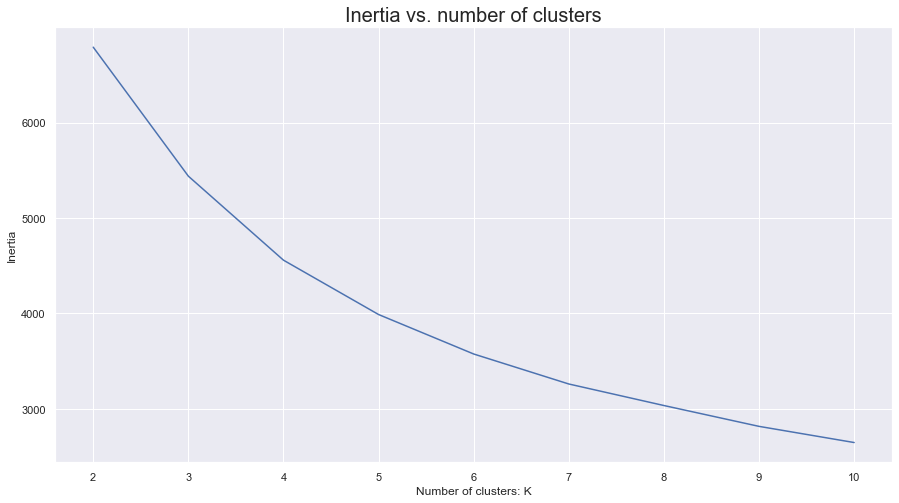

In [35]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

# cluster_cols = ['tot_num_unique_items_scaled',
#     'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
 
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]

inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

plt.rcParams.update({'font.size': 15})
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters",fontsize=20)
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()


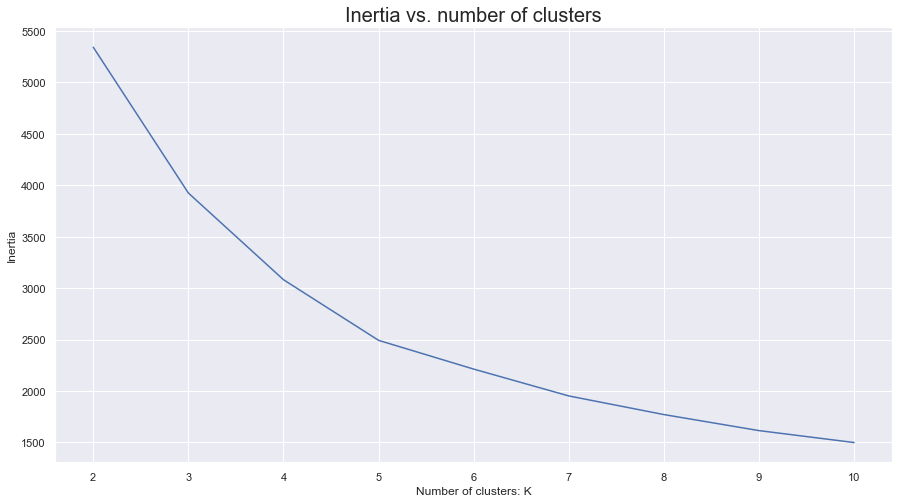

In [36]:
# cluster_cols = ['tot_num_unique_items_scaled',
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']

cluster_cols = ['tot_num_unique_items_scaled',
    'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]

inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

plt.rcParams.update({'font.size': 15})
plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters",fontsize=20)
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()


#### Functions to create a polar graph


In [37]:

# # THEN:

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(df, cols, **kwargs):
    df = df.loc[:, cols]
    df = df.to_numpy()
    if 'scaletype' in kwargs and kwargs['scaletype'] == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    scaler.fit(df)
    X = scaler.transform(df)
    dff = pd.DataFrame(X, columns = cols)
    return dff, scaler

def get_kmeans(data, cols, n_clusters = 3, random_state = 42, **kwargs):
    data, scaler = scale(df = data, cols = cols, **kwargs)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init = 10, tol = 1e-04, random_state = random_state)
    kmeans.fit(data)
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = kmeans.labels_
    polars = clusters.groupby('label').mean().reset_index()
    polars = pd.melt(polars, id_vars = ['label'])
    fig = px.line_polar(polars, r='value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polars, clusters, scaler

def get_clusters(data, cols, cluster_labels):
    data = data[cols]
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = cluster_labels
    polar = clusters.groupby('label').mean().reset_index()
    polar = pd.melt(polar, id_vars = ['label'])
    fig = px.line_polar(polar, r = 'value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polar, clusters, scaler


In [38]:
# cols1 = ['Number of Unique Products', 'Moderately Priced', 'Expensive',
#        'Most_Variety', 'Popular_Bottles', 'Volume_For_Dollar']

In [39]:
# df_graph.columns

In [40]:
# stores_clust_info_combined4[cols1].describe().round(2)

In [102]:
# clust_pct = ['cl_Cheap', 'tot_num_unique_items',
#  'cl_High_End',
#  'cl_Moderately_High',
 
#  'cl_Popular_Bottles',
#  'cl_Volume_For_Dollar']

# 
# 'rev_Most_Variety',
cols_ = ['tot_num_unique_items',
 'rev_Cheap',
'rev_Moderately_High',
 
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']

df_graph = stores_clust_info_combined4[cols_]

# df_graph.rename(columns={'tot_num_unique_items':'Number of Unique Products','rev_Cheap':'Moderately Priced',
#                          'rev_Moderately_High':'Expensive','rev_Most_Variety':'Most_Variety','rev_Popular_Bottles':'Popular_Bottles',
#                         'rev_Volume_For_Dollar':'Volume_For_Dollar'},inplace=True)

df_graph.columns
# cols1 = ['Number of Unique Products', 'Moderately Priced', 'Expensive',
#        'Most_Variety', 'Popular_Bottles', 'Volume_For_Dollar']


cols1 = cols_
#col
#df_scaled = scale(stores_clust_info_combined4, cols1)
fig, polars, clusters, scaler = get_kmeans(df_graph, cols = cols1,n_clusters=3)
fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# plt.figure(figsize = (12,10))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()



C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is depreca

In [42]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)



In [103]:
#      ['tot_num_unique_items',
#      'num_unique_clusters',
#      'tot_item_count',
product_clusters =     ['rev_Cheap', 
      'rev_High_End',
     
     'rev_Moderately_High',
     'rev_Most_Variety',
     'rev_Popular_Bottles',
     'rev_Quick_Shots',
     'rev_Volume_For_Dollar']#'rev_Quick_Shots',

#### Note: rev_Moderately_High was used in clustering because clustering without it did not segment the stores as well, particularly the convenience stores.


In [44]:
stores_clust_info_combined4[product_clusters].describe().round(2)

,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar
count,1930.00,1930.00,1930.00,1930.00,1930.00,1930.00,1930.00
mean,26.88,0.51,2.89,13.96,37.87,5.58,12.29
std,8.85,2.36,5.34,9.47,14.60,6.59,11.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.23,0.00,0.00,6.87,25.87,1.29,3.45
50%,27.21,0.00,0.71,11.22,36.50,3.19,7.67
75%,33.07,0.32,3.88,19.96,49.94,7.92,19.78
max,85.79,68.21,83.05,100.00,77.35,100.00,61.83


In [45]:
stores_clust_info_combined4.columns

Index(['Store_Number', 'Store_Name', 'store_revenue', 'tot_num_unique_items',
       'num_unique_clusters', 'tot_item_count', 'rev_Cheap', 'rev_High_End',
       'rev_Moderately_High', 'rev_Most_Variety', 'rev_Popular_Bottles',
       'rev_Quick_Shots', 'rev_Volume_For_Dollar', 'prod_count_pct_Cheap',
       'prod_count_pct_High_End', 'prod_count_pct_Moderately_High',
       'prod_count_pct_Most_Variety', 'prod_count_pct_Popular_Bottles',
       'prod_count_pct_Quick_Shots', 'prod_count_pct_Volume_For_Dollar',
       'item_Cheap', 'item_High_End', 'item_Moderately_High',
       'item_Most_Variety', 'item_Popular_Bottles', 'item_Quick_Shots',
       'item_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar', 'Address', 'City', 'Zip_Code',
       'Store_Location', 'County_Number', 'County', 'distillery',
       'tot_num_unique_items_scaled', 'rev_Cheap_scaled',
       'rev_Mode

In [46]:
product_clusters =     ['rev_Cheap', 
      'rev_High_End',
     
     'rev_Moderately_High',
     'rev_Most_Variety',
     'rev_Popular_Bottles',
     'rev_Quick_Shots',
     'rev_Volume_For_Dollar','rev_Quick_Shots']

In [47]:
# stores_clust_info_combined4[product_clusters].head(100)

In [48]:
# 3 clusters

In [49]:
cluster_cols = ['tot_num_unique_items_scaled',       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

model = KMeans(n_clusters=3, random_state=42)

model.fit(stores_clust_info_combined4[cluster_cols])

stores_clust_info_combined4['label_2'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [50]:
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count',
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median'],'store_revenue':['median']})

,Store_Number,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,store_revenue
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,261,834.0,18.928328,8.872865,26.455407,21.091499,13.670017,452101.94
1,559,270.0,19.668997,1.792200,18.716599,28.730060,25.075626,158000.66
2,1110,100.0,31.934372,0.000000,7.537063,48.010761,4.097087,40326.04


In [51]:
# cluster_cols = ['tot_num_unique_items_scaled',
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']

cluster_cols = ['tot_num_unique_items_scaled',       
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']
# 'rev_Moderately_High_scaled',

# model = KMeans(n_clusters=3, random_state=42)

# model.fit(stores_clust_info_combined4[cluster_cols])

# stores_clust_info_combined4['label_2'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [52]:
# stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
#                                                     'tot_num_unique_items':['mean','median','std'],
#  'cl_Cheap':['mean','median','std'],
#  'cl_Moderately_High':['mean','median','std'],
 
#  'cl_Popular_Bottles':['mean','median','std'],
#  'cl_Volume_For_Dollar':['mean','median','std'],'cl_High_End':['mean','median','std']})

In [53]:

# stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
#                                                     'tot_num_unique_items':['median'],
#  'cl_Cheap':['median'],
#  'cl_High_End':['median'],
#  'cl_Moderately_High':['median'],
#  'cl_Popular_Bottles':['median'],
#  'cl_Volume_For_Dollar':['median']})

#### create features to describe the clusters

In [54]:

stores_clust_info_combined4['mod_high_lt_1_pct'] = stores_clust_info_combined4.rev_Moderately_High < 1
stores_clust_info_combined4['mod_high_lt_1_pct'].value_counts(normalize=True).round(2)

True     0.54
False    0.46
Name: mod_high_lt_1_pct, dtype: float64

In [55]:
# [s+100 if s<2000 else s for s in salaries]

stores_clust_info_combined4['liquor_or_spirit_or_beer_store'] = [True if ('liquor' in store or 'spirit' in store or 'beer' in store) else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]

stores_clust_info_combined4.liquor_or_spirit_or_beer_store.value_counts()

False    1692
True      238
Name: liquor_or_spirit_or_beer_store, dtype: int64

In [56]:
stores_clust_info_combined4['csv_or_walgreens'] =[True if ('cvs' in store or 'walgreens' in store ) else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['csv_or_walgreens'].value_counts()

False    1842
True       88
Name: csv_or_walgreens, dtype: int64

In [57]:
stores_clust_info_combined4['wal_mart'] =[True if 'wal-mart' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['wal_mart'].value_counts()

False    1870
True       60
Name: wal_mart, dtype: int64

In [58]:
stores_clust_info_combined4['target'] =[True if 'target' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['target'].value_counts()

False    1910
True       20
Name: target, dtype: int64

In [59]:
stores_clust_info_combined4['fareway'] =[True if 'fareway' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['fareway'].value_counts()

False    1823
True      107
Name: fareway, dtype: int64

In [60]:
stores_clust_info_combined4['hy_vee'] =[True if 'hy-vee' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['hy_vee'].value_counts()

False    1750
True      180
Name: hy_vee, dtype: int64

In [61]:
# Sam's Club 
stores_clust_info_combined4['sams_club'] = [True if "sam's club" in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['sams_club'].value_counts()

False    1921
True        9
Name: sams_club, dtype: int64

In [62]:
stores_clust_info_combined4['mod_high'] =[True if x > 1 else False  for x in stores_clust_info_combined4['rev_Moderately_High']]
stores_clust_info_combined4['mod_high'].value_counts(normalize=True).round(2)

False    0.54
True     0.46
Name: mod_high, dtype: float64

In [63]:
store_type = []
for store in stores_clust_info_combined4.Store_Name.str.lower():
    if ('liquor' in store or 'spirit' in store or 'beer' in store):
        store_type.append('Liquor')
    elif ('cvs' in store or 'walgreens' in store ):
        store_type.append('CVS or Walgreens')
    elif 'wal-mart' in store:
         store_type.append('Wal-Mart')
    elif 'target' in store:
        store_type.append('Target')
    elif 'fareway' in store:
         store_type.append('Fareway Stores')
    elif 'hy-vee' in store:
        store_type.append('Hy-Vee')
    elif "sam's club" in store:
        store_type.append("Sam's Club")
    elif "casey's general store" in store:
        store_type.append("Casey's General Store")
    elif 'kum & go' in store:
        store_type.append('Kum & Go')
    elif 'yesway' in store:
        store_type.append('Yesway')
    elif 'tobacco' in store:
        store_type.append('Tobacco Store')
    else:
        store_type.append('Other')
        
        
        
print('len(store_type) = ',len(store_type))        
stores_clust_info_combined4.shape

len(store_type) =  1930


(1930, 65)

In [64]:
stores_clust_info_combined4['store_type'] = store_type
stores_clust_info_combined4['store_type'].value_counts(normalize=True).round(2)

Other                    0.32
Casey's General Store    0.26
Liquor                   0.12
Hy-Vee                   0.08
Fareway Stores           0.05
Kum & Go                 0.05
CVS or Walgreens         0.05
Wal-Mart                 0.03
Target                   0.01
Yesway                   0.01
Tobacco Store            0.01
Sam's Club               0.00
Name: store_type, dtype: float64

### Columns to select

In [65]:
cols = ['Store_Name',  'City', 'Zip_Code',
        'County','store_type', 'mod_high',
         'mod_high_lt_1_pct',
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar','liquor_or_spirit_or_beer_store', 'csv_or_walgreens', 'wal_mart', 'target', 'fareway', 'hy_vee','sams_club']


In [66]:
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'cl_Cheap':['median'],
 'cl_High_End':['median'],
 'cl_Moderately_High':['median'],
 'cl_Popular_Bottles':['median'],
 'cl_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Popular_Bottles,cl_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,261,452101.94,834.0,62.500000,7.643312,10.262258,78.571429,23.348018
1,559,158000.66,270.0,33.088235,0.636943,1.140251,54.761905,11.453744
2,1110,40326.04,100.0,26.470588,0.000000,0.000000,59.523810,1.321586


# label_2 = 0 

#  small


In [67]:
# 3 clusters



stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,store_type,mod_high,mod_high_lt_1_pct,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club
1342,Liquor Tobacco & Gas,Dubuque,52001,DUBUQUE,Liquor,True,False,325120.45,578,7,1873,32.888457,1.419941,11.690990,9.448320,22.214192,4.680585,61.764706,8.280255,7.981756,8.822192,95.238095,28.669725,11.453744,True,False,False,False,False,False,False
1047,Riverside Liquor,Davenport,52803,SCOTT,Liquor,True,False,324907.09,648,7,1948,31.364459,1.773218,9.182477,12.786012,22.758448,6.085087,54.411765,8.280255,10.376283,11.050477,80.952381,28.440367,15.198238,True,False,False,False,False,False,False
56,Hy-Vee Food Store / Fleur / DSM,Des Moines,50321,POLK,Hy-Vee,True,False,1626058.42,1201,7,6312,16.672526,0.514517,6.677488,33.848188,19.320433,19.611493,71.323529,10.191083,16.077537,28.194634,88.095238,26.376147,38.546256,False,False,False,False,False,True,False
277,J D Spirits Liquor,Onawa,51040,MONONA,Liquor,True,False,212673.27,798,7,5529,21.946463,0.105796,3.817983,21.697677,25.941375,21.591834,62.500000,0.636943,7.183580,17.462483,69.047619,28.899083,24.229075,True,False,False,False,False,False,False
119,Hy-Vee / Waverly,Waverly,50677,BREMER,Hy-Vee,True,False,1210903.52,1385,7,8299,17.433618,0.262437,3.054435,27.301632,21.589883,28.192913,77.205882,8.280255,12.998860,34.151887,80.952381,31.651376,50.660793,False,False,False,False,False,True,False
42,Hy-Vee Food Store / Marshalltown,Marshalltown,50158,MARSHALL,Hy-Vee,True,False,1235456.74,1164,7,7316,13.347277,0.164533,5.608047,28.362503,26.358852,24.239470,75.000000,6.369427,14.367161,28.467485,92.857143,21.788991,36.563877,False,False,False,False,False,True,False
361,Cork and Bottle / Oskaloosa,Oskaloosa,52577,MAHASKA,Other,True,False,446990.95,1413,7,5666,24.161359,1.359567,6.083094,28.763106,21.439694,13.018429,83.088235,7.643312,14.709236,33.287858,95.238095,45.412844,41.629956,False,False,False,False,False,False,False
867,World Liquor & Tobacco,Clive,50325,POLK,Liquor,True,False,517143.38,1075,7,3403,21.927439,2.267002,13.648302,20.585608,20.856734,10.070383,83.088235,13.375796,18.472064,23.237835,92.857143,30.504587,21.145374,True,False,False,False,False,False,False
1758,Liberty View Wine & Spirits / North Liberty,North Liberty,52317,JOHNSON,Liquor,True,False,315855.37,913,7,1661,14.054312,5.037046,23.441454,28.652019,13.278001,12.018817,52.941176,18.471338,23.945268,18.144611,76.190476,16.055046,22.246696,True,False,False,False,False,False,False
1786,Neighborhood Liquor and Smokes / Ames,Ames,50014,STORY,Liquor,True,False,150875.51,667,7,1344,25.114566,2.243929,13.283050,26.787906,18.419238,6.101587,51.470588,7.006369,9.692132,13.960891,76.190476,25.688073,11.013216,True,False,False,False,False,False,False


In [68]:
cols2 = ['Store_Name',  'City', 'Zip_Code',
        'County', 
        'tot_num_unique_items', 'num_unique_clusters',
        'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar']

cols3=['cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Volume_For_Dollar']

In [69]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols2].describe().round(2)

In [70]:
# cols3
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,261.00,261.00,261.00,261.00,261.00,261.00
mean,58.47,8.94,11.43,18.88,73.60,23.63
std,19.96,6.54,6.96,10.08,20.49,13.24
min,0.00,0.00,0.00,0.05,0.00,0.00
25%,50.00,3.82,6.84,10.60,66.67,12.33
50%,62.50,7.64,10.26,18.46,78.57,23.35
75%,73.53,11.46,14.94,27.01,88.10,34.14
max,89.71,43.31,43.10,42.47,100.00,57.49


In [71]:
# stores_clust_info_combined4.liquor_or_spirit_or_beer_store.value_counts()

In [72]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols][['store_type']].value_counts(normalize=True).round(2) 

store_type    
Liquor            0.45
Hy-Vee            0.26
Other             0.25
Fareway Stores    0.03
Tobacco Store     0.01
dtype: float64

# label_2 = 1

#  small 


In [73]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

False    0.88
True     0.12
Name: liquor_or_spirit_or_beer_store, dtype: float64

In [74]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['csv_or_walgreens']].value_counts(normalize=True).round(2)

csv_or_walgreens
False               0.96
True                0.04
dtype: float64

In [75]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['wal_mart']].value_counts(normalize=True).round(2)

wal_mart
False       0.89
True        0.11
dtype: float64

In [76]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['fareway']].value_counts(normalize=True).round(2)

fareway
False      0.83
True       0.17
dtype: float64

In [77]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['hy_vee']].value_counts(normalize=True).round(2)

hy_vee
False     0.9
True      0.1
dtype: float64

In [78]:

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['sams_club']].value_counts(normalize=True).round(2)

sams_club
False        0.98
True         0.02
dtype: float64

In [79]:

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['store_type']].value_counts(normalize=True).round(2)

store_type           
Other                    0.40
Fareway Stores           0.17
Liquor                   0.12
Wal-Mart                 0.11
Hy-Vee                   0.09
CVS or Walgreens         0.04
Target                   0.04
Sam's Club               0.02
Tobacco Store            0.01
Casey's General Store    0.01
dtype: float64

In [80]:
'mod_high'
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['mod_high']].value_counts(normalize=True).round(2)

mod_high
True        0.68
False       0.32
dtype: float64

In [81]:
#small
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,store_type,mod_high,mod_high_lt_1_pct,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club
292,Wal-Mart 5115 / Davenport,Davenport,52806,SCOTT,Wal-Mart,False,True,380194.65,356,7,2380,21.356276,0.078907,0.874605,29.973631,16.867739,30.743613,42.647059,0.636943,0.798176,7.457935,66.666667,0.458716,21.145374,False,False,True,False,False,False,False
57,Hy-Vee Food Store / Fort Dodge,Fort Dodge,50501,WEBSTER,Hy-Vee,True,False,522383.56,486,7,2390,15.983455,0.246688,1.239017,23.548909,33.246967,25.541118,44.117647,3.821656,2.166477,11.778081,66.666667,1.834862,23.348018,False,False,False,False,False,True,False
1739,Three Doors Down Liquor,Whittemore,50598,KOSSUTH,Liquor,True,False,28142.55,101,7,183,6.130575,2.056495,2.788802,18.215407,19.102747,50.650314,5.882353,3.184713,0.798176,1.273306,30.952381,1.146789,7.709251,True,False,False,False,False,False,False
321,Wal-Mart 3630 / Marion,Marion,52302,LINN,Wal-Mart,True,False,816306.41,619,7,4685,15.218747,0.374837,2.213682,27.048790,18.535129,32.560593,57.352941,1.273885,3.306727,13.096862,78.571429,15.366972,26.872247,False,False,True,False,False,False,False
446,Fareway Stores #987 / Davenport,Davenport,52806,SCOTT,Fareway Stores,True,False,590223.90,387,7,1224,20.041064,1.048605,8.987993,14.507405,26.383086,28.171790,32.352941,10.191083,9.806157,6.184629,47.619048,3.211009,15.638767,False,False,False,False,True,False,False
1833,Rush Stop / Charles City,Charles City,50616,FLOYD,Other,True,False,119186.36,412,7,930,24.132896,0.327210,3.913535,14.306788,21.458294,15.497352,50.735294,1.273885,1.710376,5.729877,80.952381,22.935780,14.537445,False,False,False,False,False,False,False
283,Wal-Mart 1625 / Lemars,Le Mars,51031,PLYMOUTH,Wal-Mart,False,True,234542.94,177,6,1278,19.112654,0.000000,0.448958,16.066951,31.725005,30.865666,28.676471,0.000000,0.228050,2.455662,50.000000,3.899083,9.691630,False,False,True,False,False,False,False
1827,Hiway 20 Liquor and Tobacco / Fort Dodge,Fort Dodge,50501,WEBSTER,Liquor,True,False,257421.85,701,7,2503,30.771401,0.355222,3.651512,12.629262,30.295552,12.325683,65.441176,3.821656,5.245154,12.914961,83.333333,30.963303,23.348018,True,False,False,False,False,False,False
1167,State Food Mart,Bettendorf,52722,SCOTT,Other,True,False,117211.19,222,6,713,27.785248,0.000000,2.077430,14.366316,28.953430,14.927414,37.500000,0.000000,0.570125,2.955889,71.428571,9.174312,6.828194,False,False,False,False,False,False,False
244,Wal-Mart 2004 / Dubuque,Dubuque,52003,DUBUQUE,Wal-Mart,True,False,431120.64,456,6,2727,17.370748,0.000000,2.596867,27.696241,21.230688,29.814272,44.117647,0.000000,2.166477,10.095498,66.666667,4.128440,24.008811,False,False,True,False,False,False,False


In [82]:

# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols2].describe().round(2)

In [83]:

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,559.00,559.00,559.00,559.00,559.00,559.00
mean,34.91,1.34,1.97,5.89,54.03,12.26
std,14.28,2.17,2.24,3.87,16.70,6.47
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,25.74,0.00,0.34,3.21,42.86,7.27
50%,33.09,0.64,1.14,5.18,54.76,11.45
75%,44.12,1.91,2.85,7.78,66.67,16.08
max,77.94,14.65,13.57,19.33,95.24,34.36


In [84]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,261,452101.94,834.0,18.928328,8.872865,26.455407,21.091499,13.670017
1,559,158000.66,270.0,19.668997,1.792200,18.716599,28.730060,25.075626
2,1110,40326.04,100.0,31.934372,0.000000,7.537063,48.010761,4.097087


# label_2 == 2

 large 


In [85]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

False    0.95
True     0.05
Name: liquor_or_spirit_or_beer_store, dtype: float64

In [86]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['csv_or_walgreens'].value_counts(normalize=True).round(2)

False    0.94
True     0.06
Name: csv_or_walgreens, dtype: float64

In [87]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['wal_mart'].value_counts(normalize=True).round(2)

False    1.0
Name: wal_mart, dtype: float64

In [88]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['target'].value_counts(normalize=True).round(2)

False    1.0
Name: target, dtype: float64

In [89]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['fareway'].value_counts(normalize=True).round(2)

False    1.0
True     0.0
Name: fareway, dtype: float64

In [90]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['hy_vee'].value_counts(normalize=True).round(2)

False    0.97
True     0.03
Name: hy_vee, dtype: float64

In [91]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['sams_club'].value_counts(normalize=True).round(2)

False    1.0
Name: sams_club, dtype: float64

### store type for medium cluster

In [92]:

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['store_type'].value_counts(normalize=True).round(2)

Casey's General Store    0.45
Other                    0.29
Kum & Go                 0.09
CVS or Walgreens         0.06
Liquor                   0.05
Hy-Vee                   0.03
Yesway                   0.02
Tobacco Store            0.00
Fareway Stores           0.00
Name: store_type, dtype: float64

In [93]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['mod_high'].value_counts(normalize=True).round(2)

False    0.78
True     0.22
Name: mod_high, dtype: float64

In [94]:

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['rev_Moderately_High'].describe().round(2)

count    1110.00
mean        1.13
std         2.53
min         0.00
25%         0.00
50%         0.00
75%         0.77
max        21.27
Name: rev_Moderately_High, dtype: float64

In [95]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, 17% carry expensive products
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,store_type,mod_high,mod_high_lt_1_pct,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club
518,Kum & Go #124 / Story City,Story City,50248,STORY,Kum & Go,False,True,59987.51,111,6,1211,34.568613,0.000000,0.524809,6.857377,43.942181,9.495627,30.147059,0.000000,0.114025,1.091405,57.142857,3.440367,1.321586,False,False,False,False,False,False,False
1753,Mod / Fort Madison,Fort Madison,52627,LEE,Other,True,False,26597.50,102,6,179,33.775505,0.000000,9.381220,17.696588,30.644835,1.931009,22.058824,0.000000,0.798176,1.409732,47.619048,2.522936,0.660793,False,False,False,False,False,False,False
589,Circle K #4706602 / Clinton,Clinton,52732,CLINTON,Other,False,True,44597.24,66,5,238,30.980617,0.000000,0.000000,5.123994,36.571635,1.206532,20.588235,0.000000,0.000000,0.181901,28.571429,4.816514,0.220264,False,False,False,False,False,False,False
1335,Casey's General Store #1941 / Ankeny,Ankeny,50021,POLK,Casey's General Store,False,True,61944.71,134,6,649,29.475447,0.000000,0.070224,7.940145,51.160075,6.402774,33.088235,0.000000,0.114025,1.227831,69.047619,5.733945,1.541850,False,False,False,False,False,False,False
1263,Quik Trip #530 / Euclid,Des Moines,50313,POLK,Other,False,True,99507.83,71,5,1932,34.426326,0.000000,0.000000,1.403467,53.618776,2.253169,20.588235,0.000000,0.000000,0.045475,45.238095,5.045872,0.220264,False,False,False,False,False,False,False
1426,Casey's #3770 - Glenwood,Glenwood,51534,MILLS,Other,False,True,33675.45,99,6,233,25.245127,0.000000,0.594201,9.821873,56.797964,4.456065,25.000000,0.000000,0.114025,1.091405,71.428571,0.917431,1.321586,False,False,False,False,False,False,False
1460,Hass Market,Clinton,52732,CLINTON,Other,True,False,121115.66,200,7,746,30.672425,3.599130,6.866321,7.171905,24.634998,16.391712,38.970588,1.910828,3.306727,1.455207,64.285714,7.568807,5.066079,False,False,False,False,False,False,False
1317,Casey's General Store #2689 / Ankeny,Ankeny,50023,POLK,Casey's General Store,False,True,93852.70,184,6,928,31.566508,0.000000,0.178919,10.349260,50.188732,4.008761,37.500000,0.000000,0.228050,2.455662,73.809524,8.944954,1.541850,False,False,False,False,False,False,False
986,Sam's Food,Davenport,52802,SCOTT,Other,True,False,179765.34,165,6,864,43.767258,0.000000,6.157817,2.603922,30.700156,2.059118,38.970588,0.000000,1.368301,0.773079,54.761905,11.926606,1.762115,False,False,False,False,False,False,False
1187,Casey's General Store # 1861/ Bondurant,Bondurant,50035,POLK,Casey's General Store,False,True,45980.02,152,5,330,34.609989,0.000000,0.000000,10.404323,47.360310,2.829968,36.764706,0.000000,0.000000,1.455207,73.809524,7.568807,1.321586,False,False,False,False,False,False,False


In [96]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores 
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,1110.00,1110.00,1110.00,1110.00,1110.00,1110.00,1110.00,1110.00
mean,121.42,5.43,32.10,0.16,1.13,8.14,46.34,5.27
std,81.62,0.83,6.76,0.73,2.53,4.57,12.14,4.29
min,9.00,2.00,2.23,0.00,0.00,0.00,7.76,0.00
25%,78.00,5.00,27.78,0.00,0.00,5.13,38.51,2.43
50%,100.00,5.00,31.93,0.00,0.00,7.54,48.01,4.10
75%,128.00,6.00,35.89,0.00,0.77,10.20,55.60,6.77
max,664.00,7.00,85.79,14.31,21.27,29.19,77.35,24.05


In [97]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry much mod high
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,1110.00,1110.00,1110.00,1110.00,1110.00,1110.00
mean,27.00,0.27,0.36,1.20,56.39,1.89
std,11.14,0.96,0.93,1.37,14.94,1.95
min,1.47,0.00,0.00,0.00,2.38,0.00
25%,19.85,0.00,0.00,0.50,47.62,0.88
50%,26.47,0.00,0.00,0.84,59.52,1.32
75%,32.35,0.00,0.11,1.27,66.67,2.20
max,68.38,12.74,7.87,16.46,90.48,19.38


In [98]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],

                                                      'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,261,452101.94,834.0,18.928328,8.872865,26.455407,21.091499,13.670017
1,559,158000.66,270.0,19.668997,1.792200,18.716599,28.730060,25.075626
2,1110,40326.04,100.0,31.934372,0.000000,7.537063,48.010761,4.097087


In [99]:
stop

NameError: name 'stop' is not defined

### label_2 == 3

### smaller sized supermarkets and liquor stores 

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['csv_or_walgreens'].value_counts(normalize=True).round(4)

In [ ]:
# ['wal_mart']
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['wal_mart'].value_counts(normalize=True).round(2)

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['fareway'].value_counts(normalize=True).round(4)

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['hy_vee'].value_counts(normalize=True).round(2)

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['store_type'].value_counts(normalize=True).round(2)

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['mod_high'].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4['mod_high'] =[True if x > 3 else False  for x in stores_clust_info_combined4['rev_Moderately_High']]
# stores_clust_info_combined4['mod_high'].value_counts(normalize=True).round(2)

In [ ]:

# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['mod_high'].value_counts(normalize=True).round(2)

In [ ]:
#  4 Clusters smaller sized supermarkets and liquor stores 
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols].sample(n=100) 

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols2].describe().round(2)

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols3].describe().round(2)

### label_2 = 0 

### convenience stores


### label_2 = 1
### Large =  large supermarkets and liquor stores with the most variety of products, 


### label_2 == 2
### Medium =  drug stores, Walmart, medium size grocery stores and liquor stores, don't carry much mod high 


### label_2 == 3
### Smaller = smaller sized supermarkets and liquor stores that carry more mod high 


In [ ]:
clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}


stores_clust_info_combined4['Store_Cluster'] = stores_clust_info_combined4['label_2'].map(clust_dict)


In [ ]:
round(stores_clust_info_combined4.groupby(['Store_Cluster'])['mod_high'].mean() * 100,2)

In [ ]:
stores_clust_info_combined4.store_type.value_counts(normalize=True).round(2)*100

In [ ]:
top_5 =['Other',"Casey's General Store", 'Liquor','Hy-Vee','Fareway Stores']

In [ ]:
stores_clust_info_combined4.loc[stores_clust_info_combined4['Store_Cluster'] == 'Convenience']['store_type'].value_counts(normalize=True).round(2)*100

In [ ]:
convenience = stores_clust_info_combined4.loc[stores_clust_info_combined4['Store_Cluster'] == 'Convenience']['store_type'].value_counts(normalize=True)

In [ ]:
# convenience >=.01

In [ ]:
# conveniencez_df = convenience.to_frame().reset_index()
# conveniencez_df.columns = ['Store_Type','Percent_of_Cluster']
# conveniencez_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

conveniencez_df = convenience.to_frame().reset_index()


conveniencez_df.columns = ['Store_Type','Percent_of_Cluster']
conveniencez_df['Percent_of_Cluster'] = conveniencez_df['Percent_of_Cluster']*100

conveniencez_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

In [ ]:
conveniencez_df

In [ ]:


sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
sns.set_color_codes("pastel")
bar = sns.barplot(x="Percent_of_Cluster", y="Store_Type", data=conveniencez_df.loc[conveniencez_df.Percent_of_Cluster >=1],
            label="Total", color="b")
# bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
bar.set_xlabel('Percent of Cluster',fontsize=15)
bar.set_ylabel('Store Type',fontsize=15)
   
bar.set(xlim=(0,100))
bar.set(title='Cluster: Convenience Stores')

In [ ]:
large = stores_clust_info_combined4.loc[stores_clust_info_combined4['Store_Cluster'] == 'Large']['store_type'].value_counts(normalize=True)
large_df = large.to_frame().reset_index()
large_df.columns = ['Store_Type','Percent_of_Cluster']
large_df['Percent_of_Cluster'] = large_df.Percent_of_Cluster *100
large_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

In [ ]:
large_df['Percent_of_Cluster'] 

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
sns.set_color_codes("pastel")
bar = sns.barplot(x="Percent_of_Cluster", y="Store_Type", data=large_df.loc[large_df.Percent_of_Cluster >=1],
            label="Total", color="b")
# bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
bar.set_xlabel('Percent of Cluster',fontsize=15)
bar.set_ylabel('Store Type',fontsize=15)
   
bar.set(xlim=(0,100))
bar.set(title='Cluster: Large Stores')

In [ ]:
medium = stores_clust_info_combined4.loc[stores_clust_info_combined4['Store_Cluster'] == 'Medium']['store_type'].value_counts(normalize=True).round(2)

medium_df = medium.to_frame().reset_index()
medium_df.columns = ['Store_Type','Percent_of_Cluster']
medium_df['Percent_of_Cluster'] = medium_df.Percent_of_Cluster *100
medium_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
sns.set_color_codes("pastel")
bar = sns.barplot(x="Percent_of_Cluster", y="Store_Type", data=medium_df.loc[medium_df.Percent_of_Cluster >= 1],
            label="Total", color="b")
# bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
bar.set_xlabel('Percent of Cluster',fontsize=15)
bar.set_ylabel('Store Type',fontsize=15)
   
bar.set(xlim=(0,100))
bar.set(title='Cluster: Medium Sized Stores')

In [ ]:
smaller = stores_clust_info_combined4.loc[stores_clust_info_combined4['Store_Cluster'] == 'Smaller']['store_type'].value_counts(normalize=True).round(2)
smaller_df = smaller.to_frame().reset_index()
smaller_df.columns = ['Store_Type','Percent_of_Cluster']
smaller_df['Percent_of_Cluster'] = smaller_df.Percent_of_Cluster *100
smaller_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

In [ ]:
sns.set(font_scale=1.5)
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
sns.set_color_codes("pastel")
bar = sns.barplot(x="Percent_of_Cluster", y="Store_Type", data=smaller_df.loc[smaller_df.Percent_of_Cluster >= 1],
            label="Total", color="b")
# bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
bar.set_xlabel('Percent of Cluster',fontsize=15)
bar.set_ylabel('Store Type',fontsize=15)
   
bar.set(xlim=(0,100))
bar.set(title='Cluster: Smaller Stores')


In [ ]:
expensive_products = round(stores_clust_info_combined4.groupby(['Store_Cluster'])['mod_high'].mean() * 100)
expensive_products_df = expensive_products.to_frame().reset_index()
expensive_products_df.columns = ['Store_Cluster', 'Pct_of_stores_mod_high_gt_1_pct'] 
expensive_products_df.sort_values(by='Pct_of_stores_mod_high_gt_1_pct', ascending=False).plot.barh(x='Store_Cluster',y='Pct_of_stores_mod_high_gt_1_pct')
expensive_products_df= expensive_products_df.sort_values(by='Pct_of_stores_mod_high_gt_1_pct', ascending=False)

In [ ]:
sns.set(font_scale=1.5)
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
sns.set_color_codes("pastel")
bar = sns.barplot(x="Pct_of_stores_mod_high_gt_1_pct", y="Store_Cluster", data=expensive_products_df,
            label="Total", color="b")
# bar.set(xlim=(0,100),ylabel='Store Type',xlabel='Percent of Cluster')
bar.set_xlabel('Percent of Cluster',fontsize=15)
bar.set_ylabel('Store Cluster',fontsize=15)
   
bar.set(xlim=(0,100))
bar.set(title='Percent of Stores in Clusters Where Expensive Products Account For More Than 1 Percent of Revenue')


In [ ]:
stores_clust_info_combined4.store_type.value_counts(normalize=True).round(2)*100

In [ ]:
top_5 =['Other',"Casey's General Store", 'Liquor','Hy-Vee','Fareway Stores']

In [ ]:
# conveniencez_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')
conveniencez_df["Store_Cluster"] = 'Convenience'
conveniencez_df.head()

In [ ]:
# large_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')
large_df["Store_Cluster"] = 'Large'
large_df.head()

In [ ]:
# medium_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')
medium_df["Store_Cluster"] = 'Medium'
medium_df.head()

In [ ]:
# smaller_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')
smaller_df["Store_Cluster"] = 'Smaller'
smaller_df.head()

In [ ]:
# conveniencez_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')
# large_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')
# medium_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')
# smaller_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

stacked_cluster_store_types_pct = pd.concat([conveniencez_df,large_df,medium_df,smaller_df])

stacked_cluster_store_types_pct.head()

# cluster_revenue_pct2 = cluster_revenue_pct2[cluster_revenue_pct2['New_Category_Name_2'].isin(top5)]

In [ ]:
top_5 =['Other',"Casey's General Store", 'Liquor','Hy-Vee','Fareway Stores']

stacked_cluster_store_types_pct2 = stacked_cluster_store_types_pct[stacked_cluster_store_types_pct.Store_Type.isin(top_5)]
stacked_cluster_store_types_pct2['Percent_of_Cluster'] = stacked_cluster_store_types_pct2.Percent_of_Cluster.round()
stacked_cluster_store_types_pct2.head(50)

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)},font_scale=2)
order = ["Casey's General Store", 'Liquor','Hy-Vee','Fareway Stores','Other']
chart = sns.factorplot(y='Store_Type', x='Percent_of_Cluster', col='Store_Cluster', data=stacked_cluster_store_types_pct2, kind='bar', ci=False, \
                       order=order, palette='Blues')#,estimator=x)  #,color='skyblue'

chart.set(ylabel="", xlabel = "Percent of Stores")

# plt.figure(figsize = (15,8))

chart.set_titles(col_template= '{col_name}',fontsize='14');
# sns.set(rc = {'figure.figsize':(15,8)})

# # for legend text
# plt.setp(chart.get_legend().get_texts(), fontsize='13') 
 
# # for legend title
# plt.setp(chart.get_legend().get_title(), fontsize='14') 
plt.show()

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
# order = ["Casey's General Store", 'Liquor','Hy-Vee','Fareway Stores','Other'] order=order,
chart = sns.factorplot(y='Store_Type', x='Percent_of_Cluster', col='Store_Cluster', data=stacked_cluster_store_types_pct, kind='bar', ci=False, \
                        palette='Blues')#,estimator=x)  #,color='skyblue'

chart.set(ylabel="", xlabel = "Percent of Stores")

# plt.figure(figsize = (15,8))

chart.set_titles(col_template= '{col_name}',fontsize='14');
# sns.set(rc = {'figure.figsize':(15,8)})

# # for legend text
# plt.setp(chart.get_legend().get_texts(), fontsize='13') 
 
# # for legend title
# plt.setp(chart.get_legend().get_title(), fontsize='14') 
plt.show()

In [ ]:
stores_clust_info_combined4['Convenience'] = stores_clust_info_combined4['label_2' ]  == 0

In [ ]:
# label_2 = 1
stores_clust_info_combined4['Large'] = stores_clust_info_combined4['label_2']  == 1
stores_clust_info_combined4['Large'].head()

In [ ]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 2
stores_clust_info_combined4['Medium'] = stores_clust_info_combined4['label_2']  == 2
stores_clust_info_combined4['Medium'].head()

In [ ]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 3
stores_clust_info_combined4['Smaller'] = stores_clust_info_combined4['label_2']  == 3
stores_clust_info_combined4['Smaller'].head()

In [ ]:
stores_clust_info_combined4.head(2)

# write out stores_clust_info_combined4 

In [ ]:
stores_clust_info_combined4.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined4__use.csv')

In [ ]:
stores_clust_info_combined4.shape

In [ ]:
outliers_df

In [ ]:
drops = ['store_revenue_scaled', 'tot_num_unique_items_scaled', 'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled' ,'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled',
'cl_High_End_scaled', 'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled', 'cl_Popular_Bottles_scaled', 
'cl_Quick_Shots_scaled', 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled'] 

In [ ]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=drops) #.head(2)
stores_clust_info_combined4.shape

In [ ]:

outliers_df['label_2'] = 9999
outliers_df['label_2'].head() 

In [ ]:
outliers_df['Store_Cluster'] = 'outlier'
outliers_df['Store_Cluster'].head() 

In [ ]:
# Convenience 	Large 	Medium 	Smaller

In [ ]:
outliers_df['Convenience'] = False
outliers_df['Convenience'].head() 

In [ ]:
outliers_df['Large'] = False
outliers_df['Large'].head() 

In [ ]:
outliers_df['Medium'] = False
outliers_df['Medium'].head() 

In [ ]:
outliers_df['Smaller'] = False
outliers_df['Smaller'].head() 

In [ ]:
stores_clust_info_combined4.head(2)

In [ ]:
outliers_df.head(2)

In [ ]:
type(stores_clust_info_combined4)

In [ ]:
type(outliers_df)

In [ ]:


stores_clust_info_combined5 = pd.concat([stores_clust_info_combined4,outliers_df])
stores_clust_info_combined5.shape

In [ ]:
stores_clust_info_combined5['outler'] = stores_clust_info_combined5['Store_Cluster'] == 'outlier'
np.sum(stores_clust_info_combined5['outler'])

In [ ]:
stores_clust_info_combined5.head()

# write out stores_clust_info_combined5

In [ ]:
# stores_clust_info_combined5.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined5__.csv')

In [ ]:
# store_counts_df = 
store_counts_df = stores_clust_info_combined5.groupby(['Zip_Code']).agg({'outler':'sum','Convenience':'sum','Large':'sum','Medium':'sum','Smaller':'sum'}).reset_index()

In [ ]:
store_counts_df.columns

In [ ]:
# df.rename(columns = {"Name": "Names"}, 
#           inplace = True)

store_counts_df.rename(columns = {"outler": "outlier"},inplace = True)

In [ ]:
store_counts_df.columns

In [ ]:
stores_clust_info_combined4.groupby(['Store_Cluster']).agg({'cl_Cheap':'median', 'cl_High_End':'median', 'cl_Moderately_High':'median', 'cl_Most_Variety':'median', 'cl_Popular_Bottles':'median', 'cl_Quick_Shots':'median',
 'cl_Volume_For_Dollar':'median'})


# write out store_counts_df

In [ ]:
# store_counts_df.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\store_counts_df.csv')

In [ ]:
cols_ = ['tot_num_unique_items', 'store_revenue'
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']

# df_graph = stores_clust_info_combined4[cols_]

df_graph.rename(columns={'tot_num_unique_items':'Number of Unique Products','rev_Cheap':'Moderately Priced',
                         'rev_Moderately_High':'Expensive','rev_Most_Variety':'Most_Variety','rev_Popular_Bottles':'Popular_Bottles',
                        'rev_Volume_For_Dollar':'Volume_For_Dollar'},inplace=True)


In [ ]:
df_graph.info()

### boxplots of clusters

In [ ]:
feature = 'store_revenue'


sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues',order=['Convenience','Smaller','Medium', 'Large'])

box.set_xlabel('Store Cluster',fontsize=15)
box.set_ylabel('Store Revenue',fontsize=15)
box.set(title= 'Store Revenue By Cluster')
                 

# box.set_title(feature,fontsize=20)

#state bottle retail * 1.15 = approximate revenue to the store 

# 0.15 * state bottle retail = approximate profit

In [ ]:
# where do I put my store to make the most money
# don't worry about inventory

In [ ]:
feature = 'tot_num_unique_items'

def box(feature,ylabel,order=None,ylim=None,title=None):

    sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
    box2 = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues',order=order)

    box2.set_xlabel('Store Cluster',fontsize=15)
    box2.set_ylabel(ylabel,fontsize=15)
    if ylim:
        box2.set(ylim=ylim)
    if title:
        box2.set(title= title)


In [ ]:
box('tot_num_unique_items','Number of Unique Products',order=['Convenience','Smaller','Medium', 'Large'],title='Number of Unique Products By Cluster')

In [ ]:
order=['Convenience','Smaller','Medium', 'Large']
box('rev_Popular_Bottles','Percent',order=order, title='Percent of Store Revenue, Popular Bottles')

In [ ]:
# def box2(feature,ylabel):

#     sns.set(rc = {'figure.figsize':(15,8)})
#     box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

#     box.set_xlabel('Store Cluster',fontsize=15)
#     box.set_ylabel(ylabel,fontsize=15)
#     box.set(ylim = (0,100))

In [ ]:
box('rev_Most_Variety','Percent', order=['Convenience','Smaller','Medium','Large'],title='Percent Of Revenue, Most Variety',ylim=(0,100))

In [ ]:
order=['Convenience','Smaller','Medium', 'Large']
box('rev_Quick_Shots','Percent',order=order,title='Percent Of Revenue, Quick Shots',ylim=(0,100))

In [ ]:
order = ['Convenience','Smaller','Medium','Large']
box('rev_Volume_For_Dollar','Percent',title='Percent Of Revenue, Volume For Dollar',ylim=(0,100),order=order)

In [ ]:
order = ['Convenience','Smaller','Medium','Large']
box('rev_Moderately_High','Percent', order=order, title = 'Expensive, Percent of Revenue',ylim=(0,100))

In [ ]:
order = ['Convenience','Smaller','Medium','Large']
box('rev_Cheap','Percent',title = 'Moderately Priced, Percent of Revenue',ylim=(0,100),order=order)

In [ ]:
order = ['Convenience','Smaller','Medium','Large']
box('rev_High_End','High End Percent of Revenue', order=order, ylim=(0,100))

In [ ]:
# where do I put my store to make the most money
# don't worry about inventory

## Iowa City 	

In [ ]:
# 52245
#  population =  25,664 
#  pct_25_to_44 =24.17%
#  pct_HH_income_75k_plus =  43.12%
 



stores_clust_info_combined4.loc[stores_clust_info_combined4.Zip_Code== '52245',['Store_Cluster','Store_Name','Store_Number','City', 'Zip_Code','County',
                                                                                'tot_num_unique_items','num_unique_clusters',
                                                                              'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
                                                                                 'rev_Most_Variety', 'rev_Popular_Bottles']]


## Urbandale

In [ ]:
# 50323
stores_clust_info_combined4.loc[stores_clust_info_combined4.Zip_Code== '50323',['Store_Cluster','Store_Name','Store_Number','City', 'Zip_Code','County',
                                                                                'tot_num_unique_items','num_unique_clusters',
                                                                              'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
                                                                                 'rev_Most_Variety', 'rev_Popular_Bottles']]


## Ankeny

In [ ]:
# 50023 50023

stores_clust_info_combined4.loc[stores_clust_info_combined4.Zip_Code== '50023',['Store_Cluster','Store_Name','Store_Number','City', 'Zip_Code','County',
                                                                                'tot_num_unique_items','num_unique_clusters',
                                                                              'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
                                                                                 'rev_Most_Variety', 'rev_Popular_Bottles']]


## Des Moines


In [ ]:
# 50310
stores_clust_info_combined4.loc[stores_clust_info_combined4.Zip_Code== '50310',['Store_Cluster','Store_Name','Store_Number','City', 'Zip_Code','County',
                                                                                'tot_num_unique_items','num_unique_clusters',
                                                                              'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
                                                                                 'rev_Most_Variety', 'rev_Popular_Bottles']]



In [ ]:
# stores_clust_info_combined4.index

In [ ]:
# stores_clust_info_combined4.head()